In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as skl;

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error

%matplotlib inline

import os, sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
# Import library from my src folder    
from src.helpers import feature_importance_plot
from src.learning_curve_plot import learning_curve_plot


C:\Users\anaga\miniconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
songs_data = pd.read_pickle("../data/songs_data_final.pkl")

In [3]:
target = songs_data["genre"]
features = songs_data.drop(["genre"], axis = 1)

In [4]:
X_train, X_test, y_train_xgb, y_test_xgb = train_test_split(features, target, test_size = 0.2, random_state = 8888)

In [5]:
xgb = XGBClassifier()

In [6]:
xgb.fit(X_train, y_train_xgb)

C:\Users\anaga\miniconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\anaga\miniconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[14:15:12] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [7]:
y_pred_xgb = xgb.predict(X_test)
y_pred_xgb

array([4, 5, 4, ..., 4, 2, 2])

In [8]:
print("first five predicted values:", y_pred_xgb[0:5])
print("first five actual values:", list(y_test_xgb[0:5]))

first five predicted values: [4 5 4 2 3]
first five actual values: [3, 5, 1, 3, 3]


In [9]:
print("accuracy:", round(accuracy_score(y_test_xgb, y_pred_xgb), 2))
print("recall:", round(recall_score(y_test_xgb, y_pred_xgb, average = 'weighted'), 2))
print("precision:", round(precision_score(y_test_xgb, y_pred_xgb, average = 'weighted'), 2))
print("f1-score:", round(f1_score(y_test_xgb, y_pred_xgb, average = 'weighted'), 2))

accuracy: 0.58
recall: 0.58
precision: 0.57
f1-score: 0.57


C:\Users\anaga\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


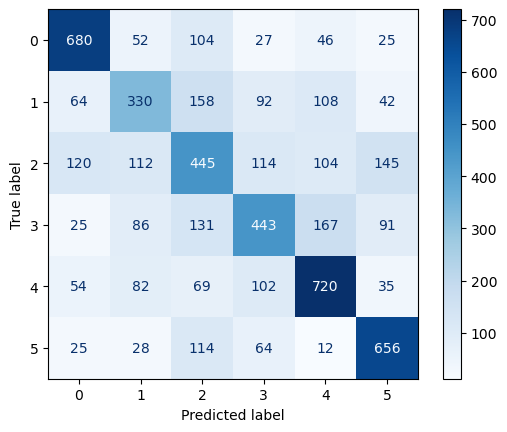

In [10]:
# plot confusion matrix

plot_confusion_matrix(xgb, X_test, y_test_xgb, cmap = plt.cm.Blues);

In [13]:
print(classification_report(y_test_xgb, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.70      0.73      0.72       934
           1       0.48      0.42      0.44       794
           2       0.44      0.43      0.43      1040
           3       0.53      0.47      0.50       943
           4       0.62      0.68      0.65      1062
           5       0.66      0.73      0.69       899

    accuracy                           0.58      5672
   macro avg       0.57      0.57      0.57      5672
weighted avg       0.57      0.58      0.57      5672



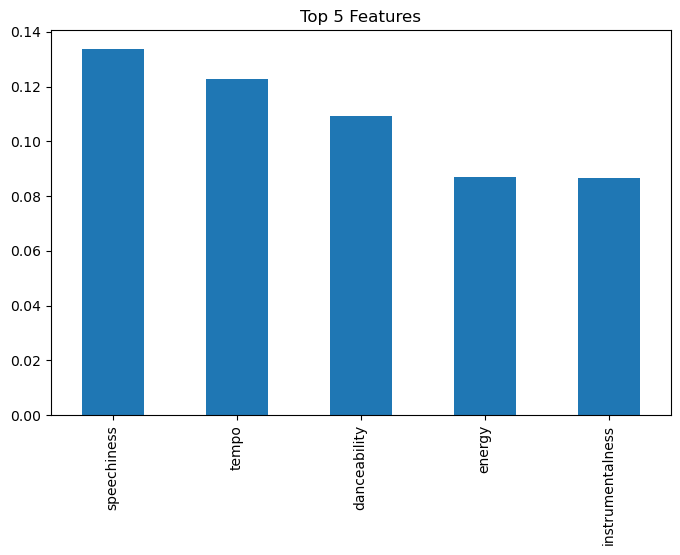

In [14]:
feature_importance_plot(xgb, X_train,5)

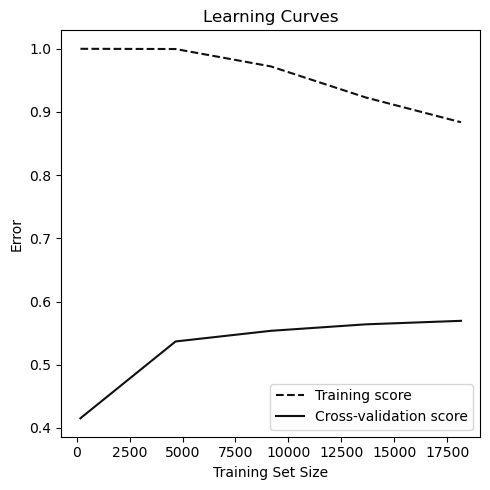

In [15]:
learning_curve_plot(xgb, X_train, y_train_xgb, scoring = 'accuracy')

# Hyperparameter

In [ ]:
XGBClassifier(n_estimators=500)

In [ ]:
# Let’s say we want to span the n_estimators hyperparameter from 100 to 500 with a step of 100 and the max_features hyperparameter from 0.1 to 1.0 with a step of 0.05. We are looking for the combination of these ranges that maximizes the average value of R2 in 5-fold cross-validation

params = {'n_estimators':np.arange(100,500,100),
          'max_features':np.arange(0.1,1.0,0.2)}

In [ ]:
from sklearn.model_selection import GridSearchCV

# Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters. 
# It is an exhaustive search that is performed on a the specific parameter values of a model. 
# The model is also known as an estimator. Grid search exercise can save us time, effort and resources.

grid_search = GridSearchCV(xgb,
                           params,
                           cv=5, 
                           scoring="r2",
                           verbose=1,
                           n_jobs=-1
                           )
grid_search.fit(X_train,y_train_xgb)

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_score_

In [ ]:
# pass in the best parameters

xgb_tuned = XGBClassifier(**grid_search.best_params_)
xgb_tuned.fit(X_train, y_train_xgb)

In [ ]:
# the evaluation metrics for the model on the training set

y_pred_train_xgb = xgb_tuned.predict(X_train)

r2 = r2_score(y_train_xgb, y_pred_train_xgb)
print("R2:", round(r2, 2))
explained_var = explained_variance_score(y_train_xgb, y_pred_train_xgb)
print("Explained Variance:", round(explained_var, 2))
mae = mean_absolute_error(y_train_xgb, y_pred_train_xgb)
print("Mean Absolute Error:", round(mae))
mse = mean_squared_error(y_train_xgb, y_pred_train_xgb)
print("Mean Squared Error:", round(mse))

In [ ]:
learning_curve_plot(xgb_tuned, X_train, y_train_xgb, scoring = 'r2')

# model still overfitting need to do some tuning